# Linear Regression with Python Scikit Learn¶
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns

In [2]:

url= "http://bit.ly/w-data"
df= pd.read_csv(url)

In [3]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# Exploratory Data Analysis

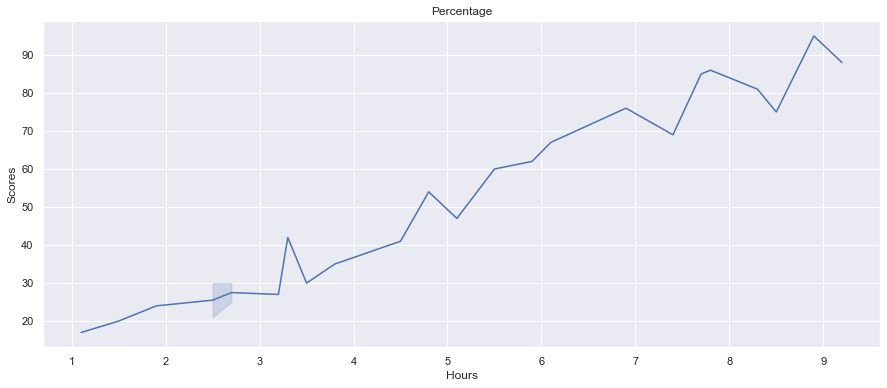

In [7]:
sns.set()
plt.figure(figsize=(15,6))
plt.title('Percentage')
sns.lineplot(x='Hours', 
             y='Scores',data = df)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Training and Testing Data

In [8]:
X = df[['Hours']]

In [9]:
y = df[['Scores']]

In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(9, 1)
(16, 1)
(9, 1)


# Training the Model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lr.coef_)

[[9.69062469]]


# Predict the test set

In [16]:
Y_pred = lr.predict(X_test)

# Visualizing training set

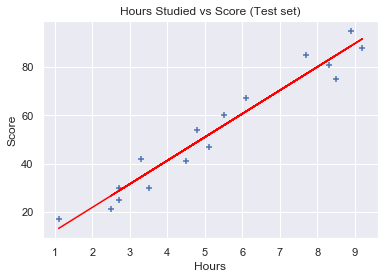

In [36]:
# plotting of training set

plt.scatter(X_train, y_train, marker = '+')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Hours Studied vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Visualizing Test set

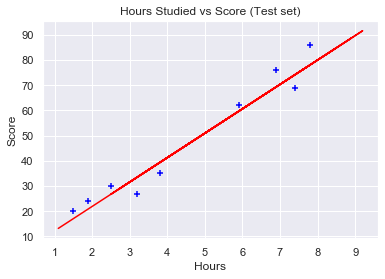

In [40]:
# plot the actual data points of test set
plt.scatter(X_test, y_test, marker = '+', color = 'blue')
# plot the regression line (same as above)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Hours Studied vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Create a scatterplot of the real test values versus the predicted values

Text(0.5, 0, 'Y test')

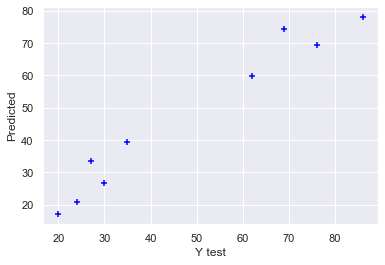

In [39]:
plt.scatter(y_test, Y_pred, marker = '+', color = 'blue')
plt.ylabel('Predicted')
plt.xlabel('Y test')

# predicted score for student studying 9.25 hrs

In [41]:

ans = lr.predict([[9.25]])
print(ans)

[[92.14523315]]


# Evaluating the model

In [42]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, Y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, Y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, Y_pred))))

MAE: 4.691397441397438
MSE: 25.463280738222547
RMSE: 5.046115410711743
